# The Ising Model and the Metropolis–Hastings algorithm

## Introduction & Motivation

The Ising Model was introduced in the 1920's by W. Lenz & E. Ising to explain the observation of a spontaneous magnetization when we cool down a ferromagnetic material below a temperature called the Curie temperature. For this project, we are modeling quantum spins on a 2 dimensional square lattice with a pandas dataframe that can take either $\pm1$ values as shown below.

 <img src="images/ising_model.svg",width=300>

In a ferromagnetic system, the spins tend to align therefore the interaction energy between 2 neighboring spins $s_i$ and $s_j$ is 

\begin{equation}
-Js_is_j
\end{equation}

where $J$ is a positive constant.  For this project, we choose $J=1$. The energy is minimized when the 2 spins have the same sign. If there is a magnetic field $h$, the interaction with the spin $i$ is

\begin{equation}
-hs_i.
\end{equation}

We call a microstate, values taken by the spins at a specific time. A macrostate is defined by macroscopic variables such as the temperature $T$ or the magnetization $M=\sum_i s_i$. The energy for a microstate is written as:

\begin{equation}
E = -J\sum_{(i,j)}s_is_j-h\sum_i s_i
\end{equation}
 
where $\sum_{(i,j)}$ is a sum taken on all the pairs of neighbors.

E. Ising has completely solved in 1925 the problem in 1 dimension (a linear chain of spin). The principal result is that this model does not yield any phase transition. In 1944, L. Onsager analytically solved the model in 2 dimensions on a square lattice in zero field. He proves the existence of a phase transition characterized by a critical temperature such that:

\begin{equation}
\sinh\frac{2J}{k_BT_c}=1
\end{equation}

For this project we choose $J=1$ and $k_B=1$

## 1 Building the spin system

In [8]:
#Import the libraries

import pandas as pd
import numpy as np

In [9]:
#Create a 50 x 50 spin lattice of all up spins to represent a ferromagnetic system

N = 50

initial_spins_df = pd.DataFrame(np.ones((N, N)))
initial_spins_df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## 1.1 The long format of the data

Because it is difficult to directly manipulate matrices in pandas are going to melt the matrix into a new dataframe such that one column will represent the x-position, one column will represent the y-position, one column will be the index column which indexes a unique X-Y position on the lattice, and the last column will represent the value of the spin.

>- We need to reset the index of `initial_spins_df` to then melt it into a long format
- change the column names to "X", "Y" and "spin_value".
- reset the current index. This step is designed to keep a column that captures an unique index for each spin
- set a multiindex to be "X", "Y".

In [10]:
# TODO: melt the initial_spins dataframe into a long dataframe
# TODO: Set the column names to "X", "Y" and "spin_value"
# TODO: reset the current index
# TODO: set the multiindex to be "X", "Y"

initial_spins_melted = pd.melt(initial_spins_df.reset_index(level=0),id_vars=["index"])
initial_spins_melted.columns = ["X","Y","spin_value"]
initial_spins_melted.reset_index(inplace=True)
initial_spins_melted.set_index(["X", "Y"],inplace=True)
initial_spins_melted



,,index,spin_value
X,Y,,
0,0,0,1.0
1,0,1,1.0
2,0,2,1.0
3,0,3,1.0
4,0,4,1.0
5,0,5,1.0
6,0,6,1.0
7,0,7,1.0
8,0,8,1.0


### 1.3 The neighboring spins

We need to now to establish the neighbors for each of the spins since it will play a role in determing the energy of the system. In this particular case, we are going to consider a spin neighbor to be a spin that is directly or above, or below, or at the left or at the right of the spin we are observing as is shown below. We add 4 more columns to our dataframes which will now contain will now contain the indices of the neighboring spins.

<img src="images/ising_neighbors.jpg",width=400>


In [11]:
# Create a column for the 4 neighboring spins for each particular spin

initial_spins_melted["right_spin"] = initial_spins_melted.groupby('Y')["index"].shift(-1)
initial_spins_melted["left_spin"] = initial_spins_melted.groupby('Y')["index"].shift(1)
initial_spins_melted["up_spin"] = initial_spins_melted.groupby('X')["index"].shift(1)
initial_spins_melted["down_spin"] = initial_spins_melted.groupby('X')["index"].shift(-1)

In [12]:
initial_spins_melted.sort_index(inplace=True)

We need to take care of the 4 bordering rows and columns in our square lattice since they lack a surrounding row or column

A thermodynamic system has of the order of $\sim10^{23}$ elements (spins here). To minimize the boundary effect of the small spin system we are constructing, we are going to assume that a spin at the extreme left of the lattice is connected on the left to a spin at the extreme right of the lattice with similar boundary conditions for the top and bottom spins of the lattice. This effectively warps the lattice onto a torus geometry

<img src="images/boundaries.png",width=400>


In [13]:
# Fill in the null values with with the boundary conditions 

initial_spins_melted.loc[(0),"left_spin"] = np.array(initial_spins_melted["index"][49])
initial_spins_melted.loc[(49),"right_spin"] = np.array(initial_spins_melted["index"][0])
initial_spins_melted.loc[(slice(None),0),"up_spin"]  = np.array(initial_spins_melted["index"][:,49])
initial_spins_melted.loc[(slice(None),49),"down_spin"] = np.array(initial_spins_melted["index"][:,0])

In [14]:
# Make sure the spin values are integer values

initial_spins_melted["right_spin"]= initial_spins_melted["right_spin"].astype(int)
initial_spins_melted["left_spin"] = initial_spins_melted["left_spin"].astype(int)
initial_spins_melted["up_spin"]   = initial_spins_melted["up_spin"].astype(int)
initial_spins_melted["down_spin"] = initial_spins_melted["down_spin"].astype(int)

In [16]:
# Get X and Y coordinate into the dataframe and reset the index

initial_spins_melted.reset_index(inplace=True)
initial_spins_melted.set_index("index", inplace=True)

In [17]:
initial_spins_melted

,X,Y,spin_value,right_spin,left_spin,up_spin,down_spin
index,,,,,,,
0,0,0,1.0,1,49,2450,50
50,0,1,1.0,51,99,0,100
100,0,2,1.0,101,149,50,150
150,0,3,1.0,151,199,100,200
200,0,4,1.0,201,249,150,250
250,0,5,1.0,251,299,200,300
300,0,6,1.0,301,349,250,350
350,0,7,1.0,351,399,300,400
400,0,8,1.0,401,449,350,450


### 1.3 The initialize  lattice function

We combine the above steps into a function that initializes an N x N array with all up spins

In [24]:
## TODO: rewrite the past steps into the following function

def initialize_spin_lattice(N):
    initial_spins_df = pd.DataFrame(np.ones((N, N)))
    
    initial_spins_melted = pd.melt(initial_spins_df.reset_index(level=0),id_vars=["index"])
    initial_spins_melted.columns = ["X","Y","spin_value"]
    initial_spins_melted.reset_index(inplace=True)
    initial_spins_melted.set_index(["X", "Y"],inplace=True)
    
    initial_spins_melted["right_spin"] = initial_spins_melted.groupby('Y')["index"].shift(-1)
    initial_spins_melted["left_spin"] = initial_spins_melted.groupby('Y')["index"].shift(1)
    initial_spins_melted["up_spin"] = initial_spins_melted.groupby('X')["index"].shift(1)
    initial_spins_melted["down_spin"] = initial_spins_melted.groupby('X')["index"].shift(-1)
    
    initial_spins_melted.sort_index(inplace=True)
    
    initial_spins_melted.loc[(0),"left_spin"] = np.array(initial_spins_melted["index"][N-1])
    initial_spins_melted.loc[(N-1),"right_spin"] = np.array(initial_spins_melted["index"][0])
    initial_spins_melted.loc[(slice(None),0),"up_spin"]  = np.array(initial_spins_melted["index"][:,N-1])
    initial_spins_melted.loc[(slice(None),N-1),"down_spin"] = np.array(initial_spins_melted["index"][:,0])
    
    initial_spins_melted["right_spin"]= initial_spins_melted["right_spin"].astype(int)
    initial_spins_melted["left_spin"] = initial_spins_melted["left_spin"].astype(int)
    initial_spins_melted["up_spin"]   = initial_spins_melted["up_spin"].astype(int)
    initial_spins_melted["down_spin"] = initial_spins_melted["down_spin"].astype(int)

    initial_spins_melted.reset_index(inplace=True)
    initial_spins_melted.set_index("index", inplace=True)
    
    return initial_spins_melted


## 2 The Monte Carlo / Metropolis Simulation

In equilibrium statitical physics, the probability of a microstate $i$ (a specific spin configuration) is given by the Maxwell-Boltzmann distribution

\begin{equation}
p_i=\frac{e^{-\frac{E_i}{k_bT}}}{\sum_{i\in\mathcal{S}}e^{-\frac{E_i}{k_bT}}}
\end{equation}

where $E_i$ is the microstate energy, $k_b$ is the Boltzmann constant, $T$ is a particular temperature and $\mathcal{S}$ is the set of all possible microstates. $\sum_{i\in\mathcal{S}}e^{-\frac{E_i}{k_bT}}$ is simply a normalization constant. The expected value of an observable $A$ can be written as

\begin{equation}
\langle A\rangle=\frac{\sum_{i\in\mathcal{S}}A_ie^{-\frac{E_i}{k_bT}}}{\sum_{i\in\mathcal{S}}e^{-\frac{E_i}{k_bT}}}
\end{equation}

So given a system that has a discrete number of states, we could, using a computer, calculate A for each state and weight these values by their Boltzman factors to find the average $A$. This might be feasible for a system with a small number of states, but if we have a $20\times20$ spin lattice interacting via the Ising model, there are $2^{400}$ states, so we cannot practically compute all of them.

Instead of sampling (measuring parameters like $A$ for) a lot of states and then weighing them by their Boltzman factors, it makes more sense to choose states based on their Boltzman factors and to then weight them equally. This is known as the Metropolis algorithm (a particular Monte Carlo method), which is an importance sampling technique. One pass through the algorithm is described here:

- One spin in the system is chosen at random.
- The energy difference of the resulting state relative to the previous state, $\Delta E$, is calculated.
- If $\Delta E\leq 0$, the spin flip is energetically favorable and thus accepted. Otherwise, a random number $0\leq\eta\leq 1$ is generated, and the spin is flipped if $\exp(-\Delta E/k_bT) > \eta$.  Since we are assuming $k_b=1$, The spin is flipped if $\exp(-\Delta E/T) > \eta$.

Before we can start measuring the observables for each monte carlo step the system should be at equilibrium state at a given temperature,  we can do so by running the monte carlo steps on an inital lattice a large number of times 

### 2.1 Computing $\Delta E$

Let's consider one spin $s_i$ in our square lattice having a value 1 or -1. The energy of a microstate is 

\begin{equation}
E = -J\sum_{(i,j)}s_is_j-h\sum_i s_i
\end{equation}

The sum $\sum_{(i,j)}s_is_j$ is taken over the spin and the 4 adjacent spins 
The change in energy $\Delta E$ of a microstate if we flip one particular spin ($s_i \leftarrow s_i\times(-1)$) is:

\begin{equation}
\Delta E = 2s_i (J\sum_{j}s_j+h)
\end{equation}



In [19]:
#Create delta E function

def deltaE(s,sum_j,h,J):
    return 2*s*(J*sum_j + h)

### 2.2 The flip function
We want to write a function that switches the selected spins in the lattice according to the metropolis hastings algorithm.  The function will take in a series of spin energies and will return an array of 1 and -1, which corresponds to whether a spin will stay the same or be flipped.  I considered 2 functions, one that uses a vectorized function and one that uses the `np.where` function.  I will use the timeit function to determine which is faster

In [76]:
# Flip function 1: uses vectorized function

def flip(delta,T,k=1):
    if delta <= 0:
        i=-1
    elif np.exp(-delta/(k*T)) > np.random.uniform():
        i=-1
    else:
        i=1
    return i

#vectorize the above functionvflip(y,2.5)
vflip = np.vectorize(flip)

In [83]:
# Flip function 2: uses np.where function

def flip2(delta,T,k=1):
    delta = np.asarray(delta)
    return np.where(np.exp(-delta/(k*T)) > np.random.uniform(),-1,1)

In [123]:
# Generate an array of 20 simulated energies to use as a test
y = np.random.normal(0,2,20)

In [124]:
import timeit

In [121]:
%timeit vflip(y,2.5)

128 µs ± 6.95 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [119]:
%timeit flip2(y,2.5)

13.2 µs ± 550 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


The second flip function is much faster.

### 2.3 One Step Function
Now we write a function that passes our lattice through one pass of the monte carlo algorithm.  The function will not return anything, it will only update the lattice dataframe after a single monte carlo step

In [125]:
## TODO: write the function one_step 

def one_step(df,       # the dataframe of the lattice to update
             T,        # the temperature 
             parityX,  # parameter to avoid to choose neighboring spins in the same batch
             parityY,   # parameter to avoid to choose neighboring spins in the same batch
             h=0,      # the external magnetic field
             frac=0.7, # the fraction of spins from the lattice to choose
            ):
    
    # This part of the code is to ensure that spins chosen cannot be neighbors
    sample_spins = df.loc[(df["X"] % 2 == parityX) & (df["Y"] % 2 == parityY)]
    # we sample the resulting data frame
    sample_spins = sample_spins.sample(frac=frac)  
    
    ## TODO: compute delta_e for all the spins in sample_spins. delta_e is a vector
    ## sum_j is the 
    
    sum_j = (df.loc[sample_spins["up_spin"], "spin_value"].values+
            df.loc[sample_spins["down_spin"], "spin_value"].values+
            df.loc[sample_spins["left_spin"], "spin_value"].values+
            df.loc[sample_spins["right_spin"], "spin_value"].values)

    s_i = sample_spins["spin_value"]

    delta_E = deltaE(s_i,sum_j,h=h,J=1)
    
    ## TODO: Choose to flip the spins or not based on delta_e, T, and uniform random numbers
    
    flip_array = flip2(delta_E,T)
    
    df.loc[sample_spins.index, "spin_value"] *= flip_array
    
    ##return flip_array
    ## No need to return anything


## 2.3 Equilibrium Function

Repeating the one step function over a large amount of times allows the system to reach an equilibrium so we can calculate the observables. The 500 iterations of the one pass function should be enough to get the system roughly to equilibrium. 

In [21]:
## The function to reach thermodynamic equilibrium for each value of T(temperature) and h() given 

def get_to_equilibrium(df,# the dataframe of the lattice to update
                       T,# the temperature 
                       h,# the magnetic field
                       frac=0.8,# the fraction of spins from the lattice to choose
                       iteration=500 # the number of iteration of the one_step function
                      ):
    for i in range(iteration):
        
        # we choose at random 0 or 1 to select a sublattice with no neighboring spins
        parity = np.random.choice([0,1], size=2)
        
        # we apply the one_step function
        one_step(df, T, parity[0], parity[1], h, frac) 

## 3  Implementing the Ising Model


This is the main part of this project where we implement the model and compute the desired obervables (magnetization, energy per spin, specfic heat, and magnetic susceptibility.  This consists of:
1. Creating a range of temperatures around the critical temperature ($T_c\approx2.26$)
2. For each temperature we create an initial lattice dataframe using our **`initialize_lattice`** function from the beginning secontion.  
 * We will pass the intialized lattice through the **`get_to_equilibirum`** function. 
 * When the lattice has reached equilibrium, we record the spins into a 'spin_evolution' dataframe that we will use to examine visually how the system evolves with temperature.
 * We continue updating the lattice in equilibirum for 500 more monte carlo steps, in each of the 500 monte carlo steps with the **`one_step`** function, we record the magnetization and energy of lattice so we can compute the overall magnetization, overall energy, magnetic susceptibility, and specific heat of the state for each temperature.
3. Repeat for all the temperatures in temperature range in step 1.

## 3.1 Calculating the observables 

Recall that to compute the expectation of the observable $A$ at a given temperature of the lattice we must compute all the possible states for the lattice 

\begin{equation}
\langle A\rangle=\frac{\sum_{i\in\mathcal{S}}A_ie^{-\frac{E_i}{k_bT}}}{\sum_{i\in\mathcal{S}}e^{-\frac{E_i}{k_bT}}}
\end{equation}

Instead we approximate the expectation by sampling through the most probable states using the monte carlo algorithm since they 'contribute' most to the average. At each temperature and for each monte carlo step $i$ we compute the observable $A_i$ and can approximate the expectation if the number of monte carlo steps is large:

\begin{equation}
\langle A\rangle\approx\frac{1}{\#\, of\, Monte\, Carlo\, Steps}\sum{A_i}
\end{equation}

 * ### Magnetization
We compute the magnetization of a lattice by taking the average spin, $N^2$ is the number of total elements in the lattice, and $s_i$ is the spin of the $i$ th element:

\begin{equation}
M  = \frac{1}{N^2}\sum_{i=1}^{N^2}s_i
\end{equation}

 * ### Energy Per Spin
To compute the energy per spin for a given lattice system:

\begin{equation}
\epsilon = \frac{-J\sum_{(i,j)}s_is_j-h\sum_i s_i}{N^2}
\end{equation}

But we assume $J=1$ and $h=0$ (for now), so the equation reduces to:

\begin{equation}
\epsilon = -\frac{{\frac{1}{2}\sum_{i}(s_i \sum_{(i,j)}s_j})}{N^2}
\end{equation}

The index $(i,j)$ represents the 4 neighboring pairs of each spin $s_i$. The factor of $\frac{1}{2}$ comes in to avoid double counting each pair of spins.

 * ### Specific Heat
The specific heat measures how much energy the system increases for every unit of temperature.
To calculate the specific heat (we assume that the Boltzman constant $k_b=1$ so $\beta = \frac{1}{T})$ :
\begin{eqnarray}
C_v &=& \frac{\partial \langle E\rangle}{\partial T} \\
&=& -\frac{\beta}{T}\left[\langle E^2\rangle - \langle E\rangle^2\right] \\ 
&=& -\frac{1}{T^2} Var(E)
\end{eqnarray}

 * ### Magnetic Suseceptibility
Magnetic susceptibility measures how susceptible (or reactive) a magnet is to be magnetized by an external magnetic field.
\begin{eqnarray}
\chi &=& \frac{\partial \langle M\rangle}{\partial h} \\
&=& \beta\left[\langle M^2\rangle - \langle M\rangle^2\right] \\
&=& \frac{1}{T} Var(M)
\end{eqnarray}

### Creating the compute energy function

Since we can calculate the magnetization directly from the lattice, we only need to create a function to compute the energy

In [17]:
def compute_energy(df):
    tot = 0
    for i in df.index:
        
        tot = tot + 0.5 * -1 * df["spin_value"].loc[i]*(df["spin_value"].loc[df["right_spin"].loc[i]]+
                                                        df["spin_value"].loc[df["left_spin"].loc[i]]+
                                                        df["spin_value"].loc[df["up_spin"].loc[i]]+
                                                        df["spin_value"].loc[df["down_spin"].loc[i]])
    return tot/len(df)

## 3  Implementing the Ising Model


This is the main part of this project where we implement the model and compute the desired obervables (magnetization, energy per spin, specfic heat, and magnetic susceptibility.  This consists of:
1. Creating a range of temperatures around the critical temperature ($T_c \approx2.269$)
2. For each temperature we create an initial lattice dataframe using our **`initialize_lattice`** function from the beginning secontion.  
 * We will pass the intialized lattice through the **`get_to_equilibirum`** function. 
 * When the lattice has reached equilibrium, we record the spins into a 'spin_evolution' dataframe that we will use to examine visually how the system evolves with temperature.
 * We continue updating the lattice in equilibirum for 500 more monte carlo steps, in each of the 500 monte carlo steps with the **`one_step`** function, we record the magnetization and energy of lattice
 * Once the 500 steps are completed we can compute the overall magnetization, overall energy, magnetic susceptibility, and specific heat for the temperature
3. Repeat for all the temperatures in our temperature in step 1.

In [137]:
## TODO: create some temperatures.
temperatures = np.linspace(1.3,3.3,40)

## TODO: initialize the spin lattice 
spin_lattice = initialize_spin_lattice(30)

## Create a dataframe to capture different equilibrium states for each column of temperature
spin_evolution = pd.DataFrame(index=spin_lattice.index, columns=temperatures)

In [139]:
## TODO: loop through each column of temperatures to capture the equilibrium state of the spins system
lattice_size = 30 
mc_steps = 1000 #Number of monte carlo steps

magnetization = np.zeros(len(temperatures))  #create array to hold the magnetization for each temperature
suscept = np.zeros(len(temperatures))        #create array to hold the susceptibility for each temperature
energy = np.zeros(len(temperatures))         #create array to hold the energy for each temperature
specific_heat =  np.zeros(len(temperatures)) #create array to hold the specific heat for each temperature



for i in range(len(temperatures)):                                      # loop through each temperature
    spin_lattice = initialize_spin_lattice(30)                          # initialize the lattice
    get_to_equilibrium(df = spin_lattice, T = temperatures[i], h = 0)   # get the lattice to equilibrium
    
    spin_evolution.iloc[:,i] = spin_lattice["spin_value"]               # record the equilibrium spin values to the spin_evolution data frame
    
    mag = np.zeros(mc_steps)                                            # array to hold the magnetization per monte carlo step
    ener = np.zeros(mc_steps)                                           # array to hold the energy per monte carlo step
    for j in range(mc_steps):                                           # after reaching equilibrium, continue the monte carlo steps but this time captureing the obervables
        parity = np.random.choice([0,1], size=2)                        # this is to ensure that no neighboring spins are chosen together
        
        one_step(df=spin_lattice,T=temperatures[i],parityX=parity[0],parityY=parity[1])   # one step function
        
        mag[j] = spin_lattice["spin_value"].mean()                      # capture the magnetization and energy per MC step
        ener[j] = compute_energy(spin_lattice)
        
        
    magnetization[i] = np.average(mag)                                  # the average of the 'mag' array is the overall magnetization
    suscept[i] = mag.var()/temperatures[i]                              # the variance of the 'mag' array is used to compute the susceptibility
    energy[i] = np.average(ener)                                        # the average of the 'ener' array is the overall energy (per spin)
    specific_heat[i] = ener.var()/(temperatures[i]**2)                  # the variance of the 'ener' array is used to compute the specific heat
    print(i+1,'/40')

1 /40
2 /40
3 /40
4 /40
5 /40
6 /40
7 /40
8 /40
9 /40
10 /40
11 /40
12 /40
13 /40
14 /40
15 /40
16 /40
17 /40
18 /40
19 /40
20 /40
21 /40
22 /40
23 /40
24 /40
25 /40
26 /40
27 /40
28 /40
29 /40
30 /40
31 /40
32 /40
33 /40
34 /40
35 /40
36 /40
37 /40
38 /40
39 /40
40 /40


The following writes code to animate how the state varies with temperature in our 40 by 40 lattice using the 'spin_evolution' dataframe.  Each pixel represents a particular spin state (Purple represents up spin and yellow down spin).  We note how the system fluctuates noticibly around the critical temperature $T_c \approx 2.27$ 

<IPython.core.display.Javascript object>


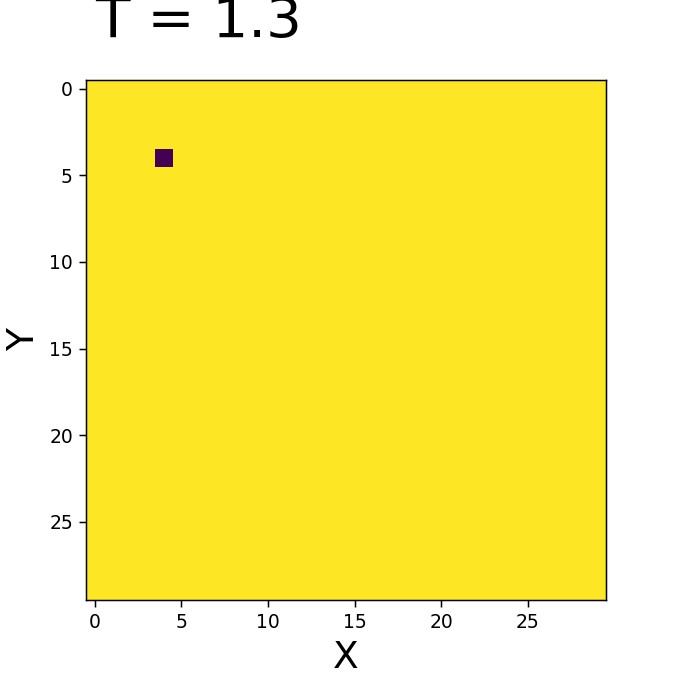

In [141]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure(figsize=(5, 5))


sign = 1
i = len(temperatures) - 1 

spin_lattice["spin_value"] = spin_evolution[temperatures[i]]

im = plt.imshow(spin_lattice.pivot(index="X", columns="Y", values="spin_value").values, animated=True)
plt.xlabel("X", fontsize=20)
plt.ylabel("Y", fontsize=20)
text = plt.text(0, -3, str(temperatures[i]), fontsize=30)

def updatefig(*args):
    global spin_evolution, spin_lattice, temperatures, sign, i
    
    if (i == 0) or (i == len(temperatures) - 1):
         sign *= -1  
    i += 1 * sign

    spin_lattice["spin_value"] = spin_evolution[temperatures[i]]
    data = spin_lattice.pivot(index="X", columns="Y", values="spin_value")
    im.set_array(data)
    text.set_text("T = " + str(temperatures[i]))

    return im,

ani = animation.FuncAnimation(fig, updatefig, frames=100, interval=1000, blit=True)

##  4 Graphing the observables as a function of temperature

In [142]:
%matplotlib inline
import matplotlib.pyplot as plt

Tc = 2./ np.log(1. + np.sqrt(2))  # The critical temperature is ~2.26

### Energy vs Temperature

The energy increases positively with temperature.  The temperature increases more around the the critical temperature.

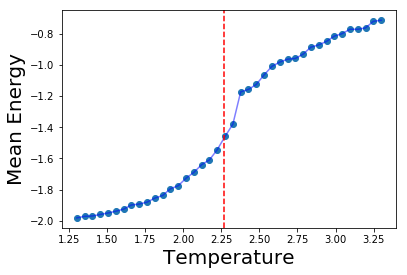

In [143]:
## TODO: plot the energy per spin as a function of the temperature
## TODO: add a vertical red line at T = Tc

plt.plot(temperatures,energy,"o")
plt.plot(temperatures,energy,color="blue",alpha=0.5)
plt.xlabel('Temperature', fontsize=20)
plt.ylabel('Mean Energy', fontsize=20)
plt.axvline(x=Tc,color='red',ls="--")

### Magnetization vs Temperature

The magnetization starts at 1 and decreases slowly up until the critical temperature, where is signficantly drops to 0 magnetization 

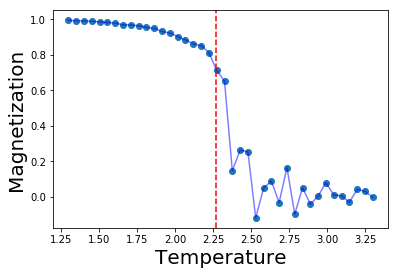

In [144]:
## TODO: plot the magnetization per spin as a function of the temperature
## TODO: add a vertical red line at T = Tc

plt.plot(temperatures,magnetization,"o")
plt.plot(temperatures,magnetization,color="blue",alpha=0.5)
plt.xlabel('Temperature', fontsize=20)
plt.ylabel('Magnetization', fontsize=20)
plt.axvline(x=Tc,color='red',ls='--')

### Specific Heat vs Tempereature

The specific heat spikes chaotically around the critical temperature.  This means the rate of energy increases or rate of energy decrease is lower when the temperature is further away the critical temperature.  After the critical temperature, increasing the tempeature yields lower energy increases.  

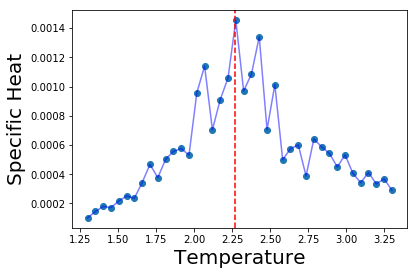

In [145]:
## TODO: plot the Specific heat per spin as a function of the temperature
## TODO: add a vertical red line at T = Tc

plt.plot(temperatures,specific_heat,"o")
plt.plot(temperatures,specific_heat,color="blue",alpha=0.5)
plt.xlabel('Temperature', fontsize=20)
plt.ylabel('Specific Heat', fontsize=20)
plt.axvline(x=Tc,color='red',ls="--")

### Magnetic Susceptibility vs Temperature

At temperatures below the critical temperature, the susceptibility is around 0, but starts spiking around the critical temperature.

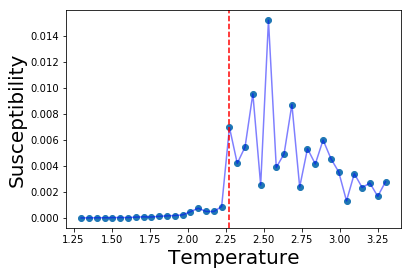

In [146]:
## TODO: plot the Magnetic susceptibility per spin as a function of the temperature
## TODO: add a vertical red line at T = Tc

plt.plot(temperatures,suscept,"o")
plt.plot(temperatures,suscept,color="blue",alpha=0.5)
plt.xlabel('Temperature', fontsize=20)
plt.ylabel('Susceptibility', fontsize=20)
plt.axvline(x=Tc,color='red', ls="--")


## 5 The $h\neq0$ case 

Now we consider the case where the strength of an external magnetic field is not null.  We consider what happens to the magnetization at 2 temperatures, one above the critical temperature and one below the critical temperature.  As we will see, the system will be subject to a hysteresis loop so we want to focus our attention on what happens when the magnetic field starts at a non zero value and slowly increments back to zero.  

We are going to consider 2 cases: 
* when the magnetic field starts at a positive value and increments backward
* when the magnetic field starts at a negative value and increments forward 

For this stage we will not be applying multiple monte carlo steps after reaching an equilibrium, since we just want to focus on what to the magnetization 

### 5.1 For $T>T_c$

We first choose a temperature above the critical temperature, $T=3$

* Then we create a range of increasing magnetic field $h$ values that starts at -2 and increments to 2

In [25]:
#Create array with increasing h values

h_forward = np.arange(-2, 2, 0.3)
h_forward

array([-2. , -1.7, -1.4, -1.1, -0.8, -0.5, -0.2,  0.1,  0.4,  0.7,  1. ,
        1.3,  1.6,  1.9])

* Initialize a $40$x$40$ array, and for each $h$ value we pass the lattice through the equilibrium function, and record down the final spin values in the `h_forward_df`.  We do not reset the lattice, and change the magnetic field $h$ value onto the same lattice and repeat.  After iterating through each $h$ value we compute the magnetization for each $h$ value and store it into the `hf_mag` dataframe.  

In [57]:
# Define a function that will compute the magnetization from a pandas series
def compute_magnetization(x):
    return x.mean()

In [28]:
spin_lattice = initialize_spin_lattice(40)                               # initialize spin lattice
h_forward_df = pd.DataFrame(index=spin_lattice.index, columns=h_forward) # create dataframe to hold equilibirum spins for each h


for i in h_forward:                                                      # iterate through the h values
    get_to_equilibrium(df = spin_lattice, T = 3, h = i)                  # get to equilibrium
    
    h_forward_df[i] = spin_lattice["spin_value"]
    
    
hf_mag = pd.DataFrame(columns=["Magnetization"],index=h_forward)         # create dataframe to store magnetization values

hf_mag["Magnetization"] = h_forward_df.apply(compute_magnetization)      # compute each magnetization for each h value

In [33]:
hf_mag # Contains magnetization for each temperaturewhen h is incremented forward

,Magnetization
-2.0,-0.93875
-1.7,-0.93000
-1.4,-0.91875
-1.1,-0.91125
-0.8,-0.84500
-0.5,-0.82500
-0.2,-0.56000
0.1,0.34500
0.4,0.71000
0.7,0.80375


Now repeat the process for decreasing magnetic field values

In [31]:
#Create decreasing h values

h_backward = np.arange(2, -2, -0.3)
h_backward

array([ 2. ,  1.7,  1.4,  1.1,  0.8,  0.5,  0.2, -0.1, -0.4, -0.7, -1. ,
       -1.3, -1.6, -1.9])

In [32]:
# Get the magnetization of the lattice as the h value decreases

spin_lattice = initialize_spin_lattice(40)                                  # initialize spin lattice
h_backward_df = pd.DataFrame(index=spin_lattice.index, columns=h_backward)  # create dataframe to hold equilibirum spins for each h

for i in h_backward:                                                        # iterate through the h values
    get_to_equilibrium(df = spin_lattice, T = 3, h = i)                     # get to equilibrium for each h value
    
    h_backward_df[i] = spin_lattice["spin_value"]
    
    
hb_mag = pd.DataFrame(columns=["Magnetization"],index=h_backward)           # create dataframe to store magnetization values

hb_mag["Magnetization"] = h_backward_df.apply(compute_magnetization)        # compute magnetization for each h value

In [34]:
hb_mag # Contains magnetization for each temperature when h is incremented backward

,Magnetization
2.0,0.95750
1.7,0.92500
1.4,0.91750
1.1,0.89250
0.8,0.81750
0.5,0.80625
0.2,0.45125
-0.1,-0.32125
-0.4,-0.74250
-0.7,-0.84500


### Plot of magnetization vs magnetic field for $T>T_c$

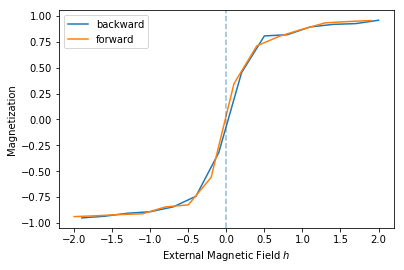

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hb_mag.index,hb_mag["Magnetization"],label="backward")
plt.plot(hf_mag.index,hf_mag["Magnetization"],label="forward")
plt.xlabel("External Magnetic Field $h$")
plt.ylabel("Magnetization")
plt.axvline(linestyle='--',alpha=0.5)
plt.legend()
plt.show()

The magnetization value of the lattice is the same at each particular $h$ value regardless of whether it is being incremented backward or forward.  The magnetization of the lattice relaxes back to zero when the external magnetic field $h$ goes to zero. Note a continuous connection between the magnetic field and magnetization

### 5. 2 For $T<T_c$

We now consider a temperature below the critical point, say $T=1$, and repeat the same process as earlier.  

In [52]:
# Get the magnetization of the lattice as the h value increases

spin_lattice = initialize_spin_lattice(40)
h_forward_df_2 = pd.DataFrame(index=spin_lattice.index, columns=h_forward)

for i in h_forward:
    get_to_equilibrium(df = spin_lattice, T = 1, h = i)
    
    h_forward_df_2[i] = spin_lattice["spin_value"]
    

hf_mag_2 = pd.DataFrame(columns=["Magnetization"],index=h_forward)

hf_mag_2["Magnetization"] = h_forward_df_2.apply(compute_magnetization)

In [53]:
# Get the magnetization of the lattice as the h value decreases

spin_lattice = initialize_spin_lattice(40)
h_backward_df_2 = pd.DataFrame(index=spin_lattice.index, columns=h_backward)

for i in h_backward:
    get_to_equilibrium(df = spin_lattice, T = 1, h = i)
    
    h_backward_df_2[i] = spin_lattice["spin_value"]


hb_mag_2 = pd.DataFrame(columns=["Magnetization"],index=h_backward)

hb_mag_2["Magnetization"] = h_backward_df_2.apply(compute_magnetization)

### Plot of magnetization vs magnetic field for $T>T_c$

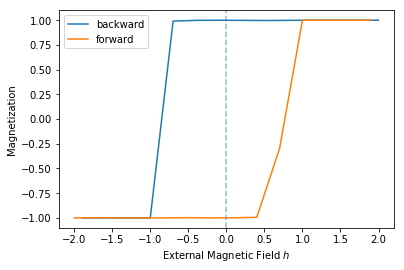

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(hb_mag_2.index,hb_mag_2["Magnetization"],label="backward")
plt.plot(hf_mag_2.index,hf_mag_2["Magnetization"],label="forward")
plt.xlabel("External Magnetic Field $h$")
plt.ylabel("Magnetization")
plt.axvline(linestyle='--',alpha=0.5)
plt.legend()
plt.show()

Now we see the hysteresis loop when the temperature is less the critical temperature.  When a ferromagnetic material is magnetized in one direction, it will not relax back to zero magnetization when the external magnetic field goes to zero.  This implies that the magnetization of the lattice is dependent on the previous state; the lattice is still magnetized even though the the magnetic field was removed.  

We also note the spontaneous jump in magnetizations when the magnetic field is being increases in magnitude, unlike the other case above:
* in the case when the $h$ value is incremented backwards, the lattice starts starts magnetization 1 and stays at that value and jumps to -1 when the magnetic field is ~$-0.7$
* the case when the $h$ value is incremented forward, the lattice starts starts magnetization -1 and stays at that value and jumps to 1 when the magnetic field is ~$0.6$
